#### 행렬곱을 할 때 연산의 순서
연산의 순서는 매우 중요하며, 결과가 달라질 수 있습니다. 주어진 입력과 가중치에 대해 원하는 연산이 무엇인지에 따라 올바른 순서를 선택

np.dot(X,W)와 np.dot(W,X)
- np.dot(X,W)는 X가 (1x3) 벡터이고, W가 (3x3) 행렬이므로, 결과는 (1x3) 벡터입니다.
- np.dot(W,X)는 W가 (3x3) 행렬이고, X가 (3,) 벡터이므로, 결과는 (3,) 벡터입니다.
- 둘 중 어느 것을 선택해야 하는지는 연산의 의미에 따라 결정
  - 입력 벡터 X를 가중치 행렬 W에 곱하여 새로운 출력 벡터를 계산하는 경우
  np.dot(X,W)를 사용.
  - 가중치 행렬 W를 입력 벡터 X에 곱하여 각 출력 뉴런에 대한 값을 계산하는 경우 np.dot(W,X)를 사용.

In [5]:
X = np.array([1,2,3])
W = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

print(np.dot(X,W)) # (1,3)(3,3) = 1,3
print(np.dot(W,X)) # (3,3)(3,1) = 3,1

[30 36 42]
[14 32 50]


In [4]:
import numpy as np
X = np.array([[1],[2],[3]])
W = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

# print(np.dot(X,W)) # (3,3)(1,3)
print(np.dot(W,X)) # (3,3)(3,1) = 3,1

[[14]
 [32]
 [50]]


#### 고유값 및 고유벡터 (Eigenvalues and Eigenvectors)

- **정의**: $A \mathbf{v} = \lambda \mathbf{v}를 만족하는 \lambda가 고유값, \mathbf{v}가 고유벡터$
- **용도**: 차원 축소 (PCA), 데이터의 중요한 패턴 찾기 등에 사용.

주어진 행렬 A와 고유값 λ, 그리고 고유벡터 v 사이의 관계는 다음과 같은 방정식으로 표현: $Av=λv$
- A는 $n×n$ 행렬.
- v는 0이 아닌 n차원 벡터로, A의 고유벡터.
- λ는 스칼라 값으로, A의 고유값.
- 고유값의 개수는 행렬의 크기에 따라 결정. 주어진 n×n 정사각 행렬
A는 최대 n개의 고유값을 가질 수 있다.

이 방정식의 의미는 행렬 A가 고유벡터 v를 변환할 때, 고유벡터 v의 방향은 변하지 않고 크기만 λ 배로 변한다는 것이며 고유벡터는 행렬 변환에 의해 방향이 바뀌지 않는 특별한 벡터를 의미

In [ ]:
# 행렬 A 정의
import numpy as np
A = np.array([[4,-2],
              [1,1]])


# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)


print("고유값:")
print(eigenvalues)

print("\n고유벡터:")
print(eigenvectors)

# 원래 행렬 A와 고유값, 고유벡터의 관계 확인
for i in range(len(eigenvalues)):
    lambda_v = eigenvalues[i]
    v = eigenvectors[:,i]
    Av = A @ v
    lambda_v_v = lambda_v * v
    print(f"\n고유값 람다 = {lambda_v}")
    print(f"A @ v = {Av}")
    print(f"람다 * v = {lambda_v_v}")

고유값:
[3. 2.]

고유벡터:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

고유값 람다 = 3.0
A @ v = [2.68328157 1.34164079]
람다 * v = [2.68328157 1.34164079]

고유값 람다 = 2.0
A @ v = [1.41421356 1.41421356]
람다 * v = [1.41421356 1.41421356]


고유값과 고유벡터의 의미:
- 행렬 A는 두 개의 주축(principal axes)을 가지고 있으며, 이 주축을 따라 데이터를 변환
- 고유값 3은 행렬의 가장 큰 고유값으로, 변환 후 가장 크게 스케일링되는 축을 나타내며 이는 변환이 이 방향에서 가장 큰 변화를 일으킨다는 것을 의미
- 고유값 2는 두 번째 고유값으로, 변환 후 두 번째로 크게 스케일링되는 축을 나타낸다.

PCA (주성분 분석):
- 고유값과 고유벡터는 데이터의 분산을 설명하는 주성분 분석에서 중요한 역할.
- 가장 큰 고유값에 해당하는 고유벡터는 데이터 분산이 가장 큰 방향을 나타내며, 이는 데이터의 주요 패턴을 나타낸다.
- 고유값이 큰 축을 따라 데이터를 변환하여 차원 축소를 수행
- 고유값이 작은 축은 데이터 분산이 적으므로 무시

In [ ]:
# Q. 다음 햄렬의 고유값과 고유벡터를 구하고 원래 행렬B와 고유값, 고유벡터의 관계를 확인
B = np.array([[3,1],[0,2]])


val, vec = np.linalg.eig(B)

print(f"고유값 \n {val}")
print(f"고유벡터 \n {vec}")

for i in range(len(val)):
    lam = val[i]
    v = vec[:,i]
    Bv = B @ v
    lam_v = lam * v
    print(f"고유값 람다 {lam}")
    print(f"B @ v {Bv}")
    print(f"람다 @ v = {lam_v}")

고유값 
 [3. 2.]
고유벡터 
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]
고유값 람다 3.0
B @ v [3. 0.]
람다 @ v = [3. 0.]
고유값 람다 2.0
B @ v [-1.41421356  1.41421356]
람다 @ v = [-1.41421356  1.41421356]


In [ ]:
for i in range(len(val)):
    lam = val[i]
    v = vec[:,i]
    le = np.dot(B,v)
    ri = lam * v


    print(f"\n고유값 {i+1}: {lam}")
    print(f"고유벡터 {i+1}: {v}")
    print(f"B * 고유벡터 : {le}")
    print(f"고유값 * 고유벡터 : {ri}")
    print(f"관계 일치 : {np.allclose(le, ri)}")


고유값 1: 3.0
고유벡터 1: [1. 0.]
B * 고유벡터 : [3. 0.]
고유값 * 고유벡터 : [3. 0.]
관계 일치 : True

고유값 2: 2.0
고유벡터 2: [-0.70710678  0.70710678]
B * 고유벡터 : [-1.41421356  1.41421356]
고유값 * 고유벡터 : [-1.41421356  1.41421356]
관계 일치 : True


#### 행렬식(Determinant)
- 행렬식은 행렬이 나타내는 선형 변환의 스케일링(확장 또는 축소) 비율을 나타낸다. 예를 들어, 행렬식이 2인 행렬은 해당 변환이 2배의 크기로 공간을 확장한다는 것을 의미.
- 행렬식은 실제로 해당 행렬이 나타내는 변환과 관련된 면적이나 부피(또는 유사한 고차원 측정값)와 관련이 있다.
- 행렬식이 0이 아닌 경우, 행렬은 가역적(역행렬이 존재)이다. 행렬식이 0이면 행렬은 가역적이지 않으며, 이는 선형 변환이 공간을 축소시켜 차원을 감소시키는(예: 평면을 선으로 변환) 효과를 가짐을 의미
- 선형 독립성 판단 : n차 정사각행렬의 행렬식이 0이 아닌 경우, 해당 행렬의 열벡터들이 선형 독립임을 나타낸다. 이는 행렬을 구성하는 벡터들이 서로 독립적이고, 공간을 완전히 채운다는 것을 의미
- 특이값 분해 및 주성분 분석 : 행렬식은 데이터의 분산을 설명하는데 도움을 준다.
- 역행렬의 존재 확인 : 역행렬이 존재하는지 여부를 행렬식을 통해 알 수 있다. 행렬식이 0이 아니면 역행렬이 존재
- 행렬식(determinant)은 행렬을 대표하는 값으로 n x n (n은 2 이상)의 정방행렬 A에 대해 다음과 같이 정의.
  - detA11이란 A에서 1행과 1열을 제외한 행렬의 행렬식을 의미.
  - 2 x 2 행렬의 요소값이 a,b,c,d라고 할 때 행렬식은 ad−bc.

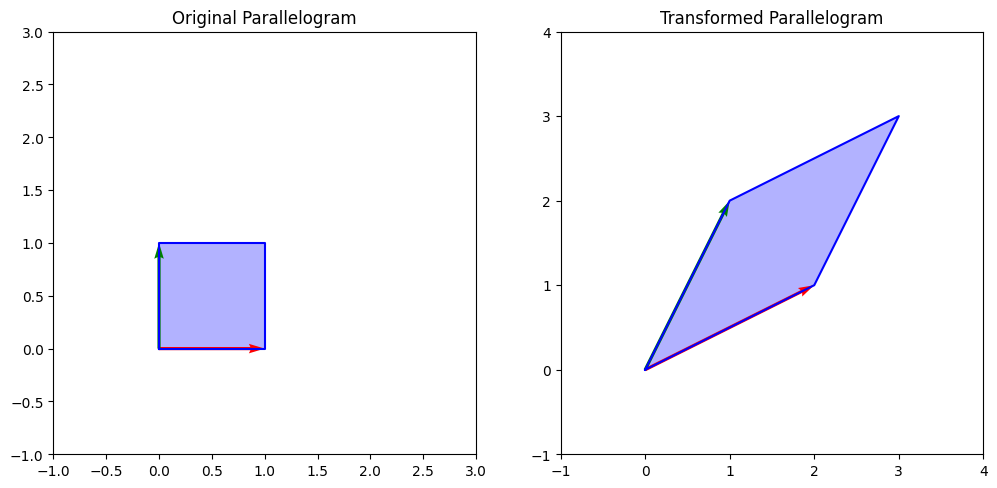

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 원래 벡터들
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# 변환 행렬
A = np.array([[2, 1], [1, 2]])

# 변환된 벡터들
v1_transformed = A @ v1
v2_transformed = A @ v2

# 원래 평행사변형의 좌표
original_parallelogram = np.array([[0, 0], v1, v1 + v2, v2, [0, 0]])

# 변환된 평행사변형의 좌표
transformed_parallelogram = np.array([[0, 0], v1_transformed, v1_transformed + v2_transformed, v2_transformed, [0, 0]])

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 원래 평행사변형
ax[0].plot(original_parallelogram[:, 0], original_parallelogram[:, 1], 'b-')
ax[0].fill(original_parallelogram[:, 0], original_parallelogram[:, 1], 'b', alpha=0.3)
ax[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
ax[0].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g')
ax[0].set_xlim(-1, 3)
ax[0].set_ylim(-1, 3)
ax[0].set_aspect('equal')
ax[0].set_title('Original Parallelogram')

# 변환된 평행사변형
ax[1].plot(transformed_parallelogram[:, 0], transformed_parallelogram[:, 1], 'b-')
ax[1].fill(transformed_parallelogram[:, 0], transformed_parallelogram[:, 1], 'b', alpha=0.3)
ax[1].quiver(0, 0, v1_transformed[0], v1_transformed[1], angles='xy', scale_units='xy', scale=1, color='r')
ax[1].quiver(0, 0, v2_transformed[0], v2_transformed[1], angles='xy', scale_units='xy', scale=1, color='g')
ax[1].set_xlim(-1, 4)
ax[1].set_ylim(-1, 4)
ax[1].set_aspect('equal')
ax[1].set_title('Transformed Parallelogram')

plt.show()


In [ ]:
A = np.array([[2,1],[1,2]])

determinant = np.linalg.det(A)
determinant

2.9999999999999996

## 데이터 분석 및 머신러닝 적용

#### 데이터 표현:

- 데이터를 벡터 및 행렬 형태로 표현. 예를 들어, 𝑚개의 샘플과 𝑛개의 특성으로 구성된 데이터 셋은 𝑚×𝑛 행렬로 나타낸다.

#### 회귀 분석 (Regression Analysis)

- 선형 회귀에서 $y = X\beta + \epsilon$ 형태로 모델링. 여기서  X는 특성 행렬,  $\beta$ 는 가중치 벡터, y는 종속 변수 벡터.

- 정규 방정식 $\beta = (X^T X)^{-1} X^T y$로 가중치를 계산.

#### 주성분 분석 (PCA):

- 데이터의 차원을 축소하기 위해 사용. 공분산 행렬의 고유값과 고유벡터를 사용하여 주성분을 찾는다.
- 고유벡터는 새로운 축을 정의하고, 고유값은 그 축의 중요성을 나타낸다.

#### 뉴럴 네트워크 (Neural Networks)
- 가중치와 입력 벡터의 행렬 곱을 통해 각 층의 출력을 계산.
- 역전파 알고리즘에서 가중치 행렬의 전치 및 행렬 미분을 사용.

#### 클러스터링 (Clustering):
- K-means와 같은 알고리즘에서 데이터 포인트와 클러스터 중심 간의 거리 계산에 벡터 연산을 사용.

In [ ]:
# m개의 샘플과 n개의 특성으로 구성된 데이터셋을 mxn 행렬로 표현


X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12]])

print(f"데이터 행렬 X: \n {X}")

데이터 행렬 X: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


회귀 분석

- 손실 함수 최소화를 위한 가중치

In [ ]:
# 선형 회귀를 수행하고 정규 방정식을 사용하여 가중치를 계산
from numpy.linalg import inv

X = np.array([[1,1],
              [1,2],
              [2,2],
              [2,3]])

# 종속 변수 벡터 y
y = np.array([6,8,9,11])

# 가중치 계산(정규 방정식)
# np.c_는 배열을 열 방향으로 연결
X_b = np.c_[np.ones((4,1)), X] # X에 절편 추가
beta = inv(X_b.T @ X_b) @ X_b.T @ y

print(f"가중치 벡터 B :\n {beta}")

가중치 벡터 B :
 [3. 1. 2.]


In [ ]:
X_b

array([[1., 1., 1.],
       [1., 1., 2.],
       [1., 2., 2.],
       [1., 2., 3.]])

In [ ]:
X_b.T

array([[1., 1., 1., 1.],
       [1., 1., 2., 2.],
       [1., 2., 2., 3.]])

In [ ]:
X_b.T @ X_b

array([[ 4.,  6.,  8.],
       [ 6., 10., 13.],
       [ 8., 13., 18.]])

주성분 분석

- 고유값 : 각 주성분의 중요도를 나타내며, 데이터의 분산을 설명
- 고유벡터 : 각 주성분의 방향을 나타낸다

In [ ]:
# 데이터의 차원을 축소하기 위해 주성분 분석을 수행
from sklearn.decomposition import PCA

X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12]])


# PCA 수행
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

print(f"주성분 분석 결과: X를 2차원 주성분 공간으로 변환한 결과 \n {X_pca}")
print(f"고유값: \n {pca.explained_variance_}")
print(f"고유벡터: \n {pca.components_}")

주성분 분석 결과: X를 2차원 주성분 공간으로 변환한 결과 
 [[-7.79422863  0.        ]
 [-2.59807621  0.        ]
 [ 2.59807621  0.        ]
 [ 7.79422863 -0.        ]]
고유값: 
 [45.  0.]
고유벡터: 
 [[ 0.57735027  0.57735027  0.57735027]
 [ 0.         -0.70710678  0.70710678]]


신경망

선형변환
- 신경망(Neural Networks) 모델에서 선형 변환의 과정은 입력 데이터가 각 층을 통과하면서 수행되는 선형 연산을 의미. 이를 통해 입력 데이터는 가중치와 편향의 영향을 받아 변환
- 선형 변환은 기본적으로 행렬 연산을 사용

선형 변환의 수식

$z=W⋅X+b$<br>
z: 선형 변환의 결과 (출력)<br>
W: 가중치 행렬 (Weights)<br>
x: 입력 벡터 (Input)<br>
b: 편향 벡터 (Bias)

과정의 단계별 설명
1. 입력 데이터 (X):입력 데이터는 n개의 특성(feature)으로 구성된 벡터. 예를 들어, $X=[x1,x2 ,...,xn]$
2. 가중치 행렬 (W): 가중치 행렬은 신경망의 각 연결에서 학습된 가중치를 나타낸다. 만약 입력 벡터 x의 차원이 n이고, 다음 층의 출력 차원이 m이라면, 가중치 행렬 W의 크기는 m×n.
3. 편향 벡터 (b):편향 벡터는 각 출력 노드에 더해지는 상수로, 모델이 입력 데이터를 보다 잘 맞추도록 도와준다. 편향 벡터 b의 크기는 출력 벡터 z의 크기와 동일. 예를 들어,
$b=[b1,b2,...,bm]$
4. 선형 연산: 입력 벡터 X와 가중치 행렬 W를 곱하고, 편향 벡터 b를 더한다.

예를 들어,<br>
$z=W⋅X+b$는 각 출력 $z_i$ 에 대해 다음과 같이 계산:
$$
z_i = \sum_{j=1}^{n} w_{ij} \cdot X_j + b_i
$$
이 연산은 입력 데이터의 선형 결합을 통해 출력 데이터를 생성하는 과정.

In [6]:
X = np.array([1,2])

# 가중치 행렬 (3개의입력, 2개의 출력)
W = np.array([[0.1,0.2],
              [0.3,0.4],
              [0.5,0.6]])


output = np.dot(X,W.T)

print(f"신경망 출력: {output}")

신경망 출력: [0.5 1.1 1.7]


In [ ]:
# 가중치와 입력 벡터의 행렬 곱을 통해 각 층의 출력을 계산
# 입력 벡터(4개의 샘플, 3개의 특성)

X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12]])

# 가중치 행렬 (3개의입력, 2개의 출력)
W = np.array([[0.1,0.2],
              [0.3,0.4],
              [0.5,0.6]])

output = X @ W

print(f"신경망 출력: \n {output}")

신경망 출력: 
 [[ 2.2  2.8]
 [ 4.9  6.4]
 [ 7.6 10. ]
 [10.3 13.6]]


1행 2열의 행렬과 2행 1열의 행렬을 곱하는 경우, 어느 행렬을 왼쪽에 놓고 어느 행렬을 오른쪽에 놓느냐에 따라 코드를 작성하여도 결과는 동일합니다. 이는 Numpy의 행렬 연산에 대한 유연성 중 하나이며, 코드를 작성할 때 편의에 따라 선택할 수 있는 장점


p = np.array([1, 2])
T = np.array([[2, 0], [0, 3]])

예시

둘의 결과값은 같다

p_prime = np.dot(T,p)
p1 = np.dot(p,T)


신경망 모델
- 신경망(Neural Networks) 모델은 선형 변환과 비선형 변환을 모두 사용하여 데이터를 처리하고 학습
- 신경망은 기본적으로 다층 구조로 이루어져 있으며, 각 층은 선형 변환과 비선형 활성화 함수를 결합하여 입력 데이터를 변환

구성 요소
- 입력층 (Input Layer): 모델에 입력되는 데이터. 각 노드는 입력 데이터의 한 특성(feature)을 나타낸다.
- 은닉층 (Hidden Layers): 입력층과 출력층 사이에 위치한 층들로, 입력 데이터를 선형 변환과 비선형 변환을 통해 처리한다.
- 출력층 (Output Layer): 모델의 최종 출력. 분류 문제에서는 클래스 확률을 출력하고, 회귀 문제에서는 연속적인 값을 출력.

선형 변환
각 층의 노드는 이전 층의 출력에 가중치(weight)를 곱하고, 편향(bias)을 더한 후 결과를 다음 층으로 전달. 이는 다음과 같이 수식으로 표현할 수 있다:<br>
$z=W⋅x+b$<br>
여기서 W는 가중치 행렬, x는 입력 벡터,b는 편향 벡터.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터셋 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# 신경망 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2688 - accuracy: 0.9212 - val_loss: 0.1376 - val_accuracy: 0.9607
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.1039 - val_accuracy: 0.9676
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0561 - accuracy: 0.9816 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.1004 - val_accuracy: 0.9717
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.1127 - val_accuracy: 0.9690
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - l

#### 군집분석
- K-means 알고리즘의 핵심은 데이터 포인트와 클러스터 중심 간의 거리를 계산
- 클러스터 중심을 갱신할 때, 각 클러스터에 속한 데이터 포인트들의 평균을 계산

In [ ]:
# K-means 알고리즘을 사용하여 데이터 포인트와 클러스터 중심 간의 거리를 계산
from sklearn.cluster import KMeans

# 예제 데이터 셋 (6개으 샘플, 2개의특성)
X = np.array([[1,2],
              [1,4],
              [1,2],
              [10,2],
              [10,4],
              [10,0]
              ])

# K-means 클러스터링
Kmeans = KMeans(n_clusters=2, n_init=10)
Kmeans.fit(X)

print(f"클러스터 중심: \n {Kmeans.cluster_centers_}")
print(f"각 데이터 포인트의 클러스터 레이블 : \n {Kmeans.labels_}")

클러스터 중심: 
 [[ 1.          2.66666667]
 [10.          2.        ]]
각 데이터 포인트의 클러스터 레이블 : 
 [0 0 0 1 1 1]
